<a href="https://colab.research.google.com/github/okanars/SalaryExpectationwithPLR/blob/main/PolynomialRegressionforSalaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Position_Salaries.csv",sep=",")
df.head()


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
df.tail()

,Position,Level,Salary
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


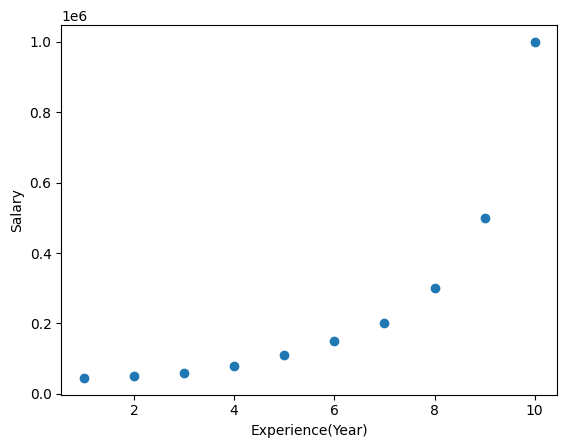

In [7]:
plt.scatter(df['Level'],df['Salary'])
plt.xlabel('Experience(Year)')
plt.ylabel('Salary')
plt.savefig('1.png',dpi=300)
plt.show()

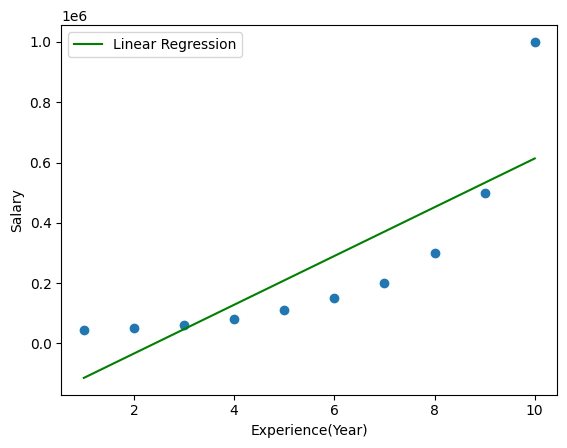

<Figure size 1400x500 with 0 Axes>

In [8]:
#As we see, The Chart isn't in a Linear form so if we use Linear Regression we'll have an unfit Line on Chart
reg = LinearRegression()
reg.fit(df[['Level']],df['Salary'])

plt.xlabel('Experience(Year)')
plt.ylabel('Salary')

plt.scatter(df['Level'],df['Salary'])
x_ach = df['Level']
y_ach = reg.predict(df[['Level']])
plt.plot(x_ach,y_ach,color="green",label = "Linear Regression")
plt.legend()
plt.figure(figsize=(14,5))
plt.show()

In [11]:
#Therefore we are starting to apply Polynomial Regression:
polynomial_reg = PolynomialFeatures(degree=3)
x_polynomial = polynomial_reg.fit_transform(df[['Level']])

In [12]:
#Training the Model

reg = LinearRegression()
reg.fit(x_polynomial,df['Salary'])

LinearRegression()

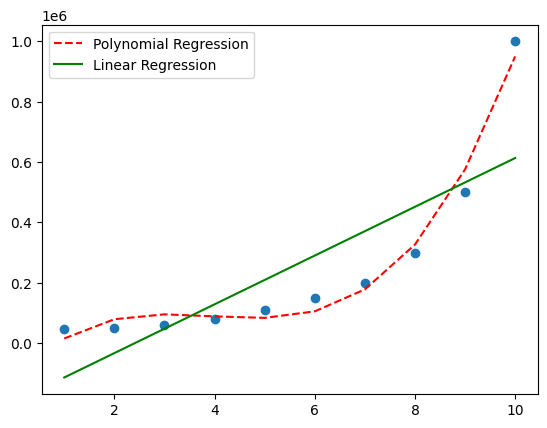

In [14]:
#In here we'll test the model for the results
y_head = reg.predict(x_polynomial)

plt.plot(df['Level'],y_head,color="red",label="Polynomial Regression",linestyle = '--')
plt.plot(x_ach,y_ach,color="green",label = "Linear Regression")
plt.legend()

plt.scatter(df['Level'],df['Salary'])
plt.show()

In [19]:
#If we have a new employee with its 4.5 level, What would be the Salary ?
x_polynomial1 = polynomial_reg.fit_transform([[4.5]])
predicted_salary = reg.predict(x_polynomial1)
salary = predicted_salary[0]
print(salary)

83979.16666666721


In [20]:
#If we have a new employee with its 6.5 level, What would be the Salary ?
x_polynomial2 = polynomial_reg.fit_transform([[6.5]])
predicted_salary = reg.predict(x_polynomial2)
salary = predicted_salary[0]
print(salary)

133259.46969697333
